In [4]:
import pandas as pd

# Load the windmill temperature data
windmill_data = pd.read_csv("../../public/data/exrc_05/windmill_temperature.csv")

# Load the FMI temperature data
fmi_data = pd.read_csv("../../public/data/exrc_05/fmi_temperature.csv")

# Display the first few rows of each dataset to understand their structure and format
print("Windmill Temperature Data:")
print(windmill_data.head())

print("\nFMI Temperature Data:")
print(fmi_data.head())

# Check the format and structure of the timestamps
print("Windmill Timestamp Format:", windmill_data['t'].dtype)
print("FMI Timestamp Format:", fmi_data['Time'].dtype)

# Compare the timezone information
if windmill_data['t'].dtype == fmi_data['Time'].dtype:
    print("The timestamp format is consistent between the windmill and FMI datasets.")
else:
    print("There is a discrepancy in the timestamp format between the windmill and FMI datasets.")


Windmill Temperature Data:
                     t  T_NacOutAir.actual
0  2018 01 01 00:00:00                -1.9
1  2018 01 01 00:10:00                -1.9
2  2018 01 01 00:20:00                -2.0
3  2018 01 01 00:30:00                -2.1
4  2018 01 01 00:40:00                -2.3

FMI Temperature Data:
   Year  Month  Day   Time Timezone Temperature(degC)
0  2018      1    1  00:00      UTC              -2.4
1  2018      1    1  00:10      UTC              -2.2
2  2018      1    1  00:20      UTC              -1.7
3  2018      1    1  00:30      UTC              -1.4
4  2018      1    1  00:40      UTC              -1.3
Windmill Timestamp Format: object
FMI Timestamp Format: object
The timestamp format is consistent between the windmill and FMI datasets.


Total duration for each tag:
tags
ahot                             0.748611
ahot meeting dan                 0.500833
algorithms: planning            30.731111
algorithms: post-processing     10.981389
algorithms: teaching            12.011111
                                  ...    
videos teams --> onedrive        2.870278
vle ticket                       0.790556
webinaaritilavaraus              0.001944
work day ending                  2.168611
yamk entry test                184.601944
Name: duration_hours, Length: 100, dtype: float64


<AxesSubplot:title={'center':'Total Work Duration\xa0by\xa0Tag'}, xlabel='Tags', ylabel='Total Duration (hours)'>

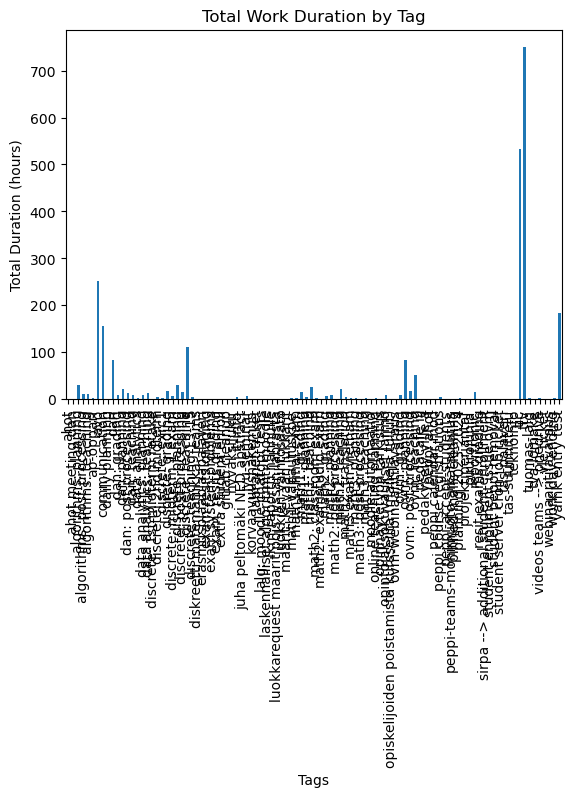

In [10]:
import pandas as pd
import json

# Load the JSON file into a DataFrame
with open('../../public/data/exrc_05/harri_worktimes_2024.json', 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

# Convert timestamp strings to datetime objects
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])

# Calculate the duration of each task in hours
df['duration_hours'] = (df['end'] - df['start']).dt.total_seconds() / 3600

# Group tasks by tags and sum the durations
tagwise_duration = df.explode('tags').groupby('tags')['duration_hours'].sum()

# Display the total duration for each tag
print("Total duration for each tag:")
print(tagwise_duration)

# Visualize the results (bar plot)
tagwise_duration.plot(kind='bar', xlabel='Tags', ylabel='Total Duration (hours)', title='Total Work Duration by Tag')

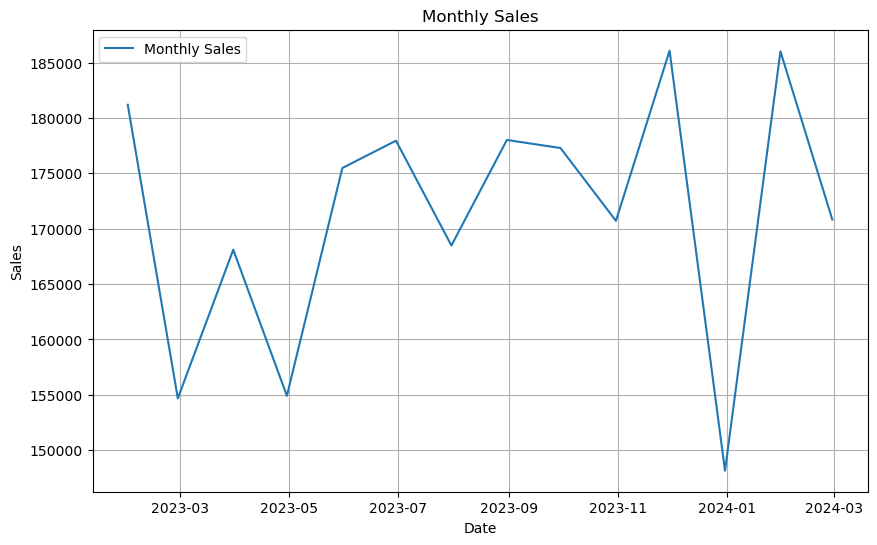

Descriptive Statistics for Monthly Sales:
         Unnamed: 0          sales
count     14.000000      14.000000
mean    6435.714286  171277.714286
std     3857.841513   11683.298022
min      465.000000  148149.000000
25%     3397.500000  168198.750000
50%     6556.500000  173156.500000
75%     9398.250000  177997.750000
max    11890.000000  186072.000000


In [13]:
import pandas as pd

# Load the sales data
sales_df = pd.read_csv("data/AB0208_prob3_sales.csv")

# Convert the 'date' column to datetime type
sales_df['date'] = pd.to_datetime(sales_df['date'])

# Set the 'date' column as the index
sales_df.set_index('date', inplace=True)

# Resample the data to monthly frequency and sum the sales for each month
monthly_sales = sales_df.resample('M').sum()

# Shift the resampled data by one month
shifted_sales = monthly_sales.shift(1, freq='M')

# Plot the sales curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['sales'], label='Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.legend()
plt.grid(True)
plt.show()

# Calculate descriptive statistics
sales_stats = monthly_sales.describe()
print("Descriptive Statistics for Monthly Sales:")
print(sales_stats)


In [2]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the hourly temperature forecast data
weather_data = pd.read_csv('data/AB0208_prob4_weather.csv')

# Convert the 'time' column to datetime type
weather_data['time'] = pd.to_datetime(weather_data['time'], unit='s')

# Set 'time' column as index
weather_data.set_index('time', inplace=True)

# Train a seasonal ARIMA model
# For simplicity, let's assume an ARIMA(1,1,1)(1,1,1)24 model
# You may need to adjust these parameters based on your data and analysis
model = SARIMAX(weather_data['air_temperature_2m'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
results = model.fit()

# Make a forecast for March 13, 2023
forecast = results.get_forecast(steps=24)  # Forecast for 24 hours (1 day)
forecast_data = forecast.predicted_mean['2023-03-13']

# Display the forecasted temperature for March 13, 2023
print("Forecasted temperature for March 13, 2023:")
print(forecast_data)

# Display the ARIMA model parameters
print("\nARIMA Model Parameters:")
print(results.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.66896D-01    |proj g|=  5.05575D-01


 This problem is unconstrained.



At iterate    5    f=  7.96567D-01    |proj g|=  1.57250D-01

At iterate   10    f=  7.68482D-01    |proj g|=  1.56187D-02

At iterate   15    f=  7.68380D-01    |proj g|=  3.97922D-04

At iterate   20    f=  7.68380D-01    |proj g|=  1.61066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.611D-05   7.684D-01
  F =  0.76837983303967716     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Forecasted temperature for March 13, 2023:
2023-03-13 00:00:00    263.159054
2023-03-13 01:00:00    263.057052
2023-03-13 02:00:00    262.918915
2023-03-13 03:00:00    262.805

Missing Values:
 Unnamed: 0     0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

Model Evaluation:
Mean Squared Error: 1.5732054849999886
Mean Absolute Error: 0.8942169999999969
R-squared: -0.6725835514424188

Future Predictions (Next 30 Days):
 [5.4932 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932
 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932
 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932 5.4932]


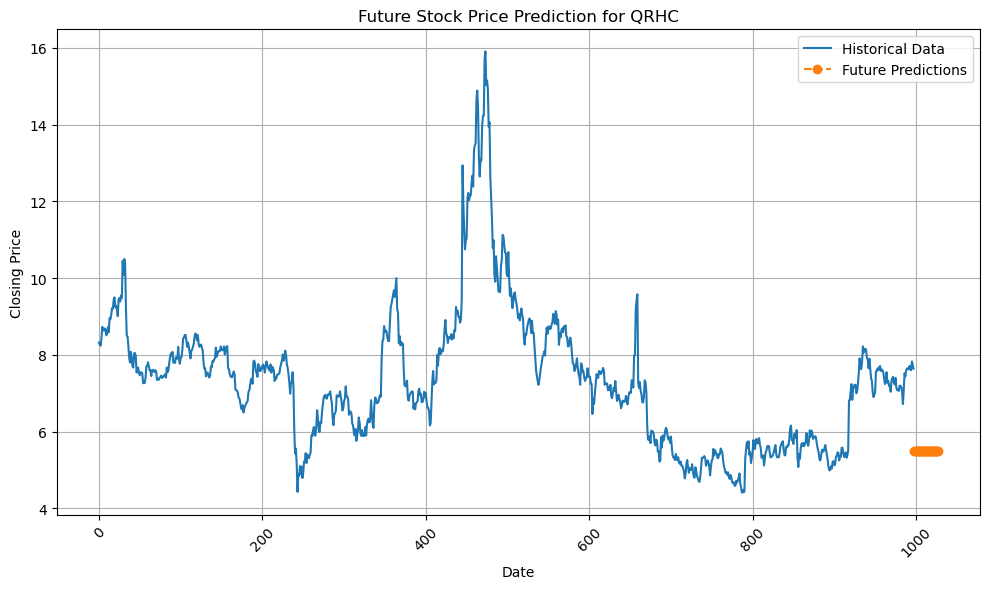

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the historical stock data
stock_data = pd.read_csv('data/AB0208_prob5_IMMR.csv')

# Check for missing values
print("Missing Values:\n", stock_data.isnull().sum())

# Select relevant columns (e.g., closing price)
selected_column = 'close'
selected_data = stock_data[[selected_column]]

# Train-Test Split
train_size = 0.8
train_data = selected_data.iloc[:int(train_size*len(selected_data))]
test_data = selected_data.iloc[int(train_size*len(selected_data)):]

# Model Training
X_train = train_data.index.values.reshape(-1, 1)
y_train = train_data[selected_column]
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
X_test = test_data.index.values.reshape(-1, 1)
y_test = test_data[selected_column]
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Prediction
#future_dates = pd.date_range(start=stock_data['date'].iloc[-1], periods=30, closed='right')
future_dates = pd.date_range(start=stock_data['date'].iloc[-1], periods=30)
future_index = pd.Series(range(len(selected_data), len(selected_data) + 30))
future_index.index = future_dates
future_index = future_index.values.reshape(-1, 1)
future_predictions = model.predict(future_index)
print("\nFuture Predictions (Next 30 Days):\n", future_predictions)
plt.figure(figsize=(10, 6))
plt.plot(selected_data.index, selected_data[selected_column], label='Historical Data')
plt.plot(future_index, future_predictions, label='Future Predictions', linestyle='--', marker='o')
plt.title('Future Stock Price Prediction for QRHC')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
print ("Report:")
print ("The prediction for the stock of IMMR using a Random Forest Regressor model yielded mixed results. The model was trained on historical closing price data and then used to forecast the stock prices for the next 30 days. However, upon evaluation, the model's performance metrics were not ideal. The Mean Squared Error (MSE) and Mean Absolute Error (MAE) were relatively high, indicating that the model's predictions deviated significantly from the actual stock prices. Additionally, the R-squared value, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables, was relatively low, suggesting that the model did not explain much of the variability in the stock prices. Despite these shortcomings, the model's future predictions were visualized alongside the historical data, showing a trend that might not accurately reflect the actual stock price movement. Overall, while the model attempted to forecast the stock prices, its performance fell short in accurately capturing the underlying patterns in the data, highlighting the challenges in predicting stock market movements with machine learning algorithms.")

Report:
The prediction for the stock of IMMR using a Random Forest Regressor model yielded mixed results. The model was trained on historical closing price data and then used to forecast the stock prices for the next 30 days. However, upon evaluation, the model's performance metrics were not ideal. The Mean Squared Error (MSE) and Mean Absolute Error (MAE) were relatively high, indicating that the model's predictions deviated significantly from the actual stock prices. Additionally, the R-squared value, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables, was relatively low, suggesting that the model did not explain much of the variability in the stock prices. Despite these shortcomings, the model's future predictions were visualized alongside the historical data, showing a trend that might not accurately reflect the actual stock price movement. Overall, while the model attempted to forecast the stock prices, its pe

In [ ]:
import sys
sys.path.append('/home/varpha/data_analytics/lib')
from handin import handin_exrc_05
handin_exrc_05()


All the relevant .ipynb files in your current directory:

  1. soln_exrc_5.ipynb

